# Clustering

## Elbow method

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
print(os.environ.get("OMP_NUM_THREADS"))

1


In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [6]:
plt.rcParams['figure.figsize']=(16,9)

In [7]:
#creating sample dataset with 4 clusters
X,Y=make_blobs(n_samples=800, n_features=3, centers=4)

In [8]:
X

array([[  9.76787054,  -4.55471544,   8.35037097],
       [  9.96920225,  -2.99155938,   9.50609987],
       [ -7.41093888,   4.41453092,   6.05660052],
       ...,
       [ -5.99834916,  -8.37561348,   2.16049461],
       [  9.74600689,  -4.46921266,   7.97844567],
       [ -8.19211048, -11.47488246,   2.47337649]])

In [9]:
# Finding optimal number of clusters using elbow method
wcss_list=[] #initializing list for values of WCSS

In [15]:
#Iterations
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

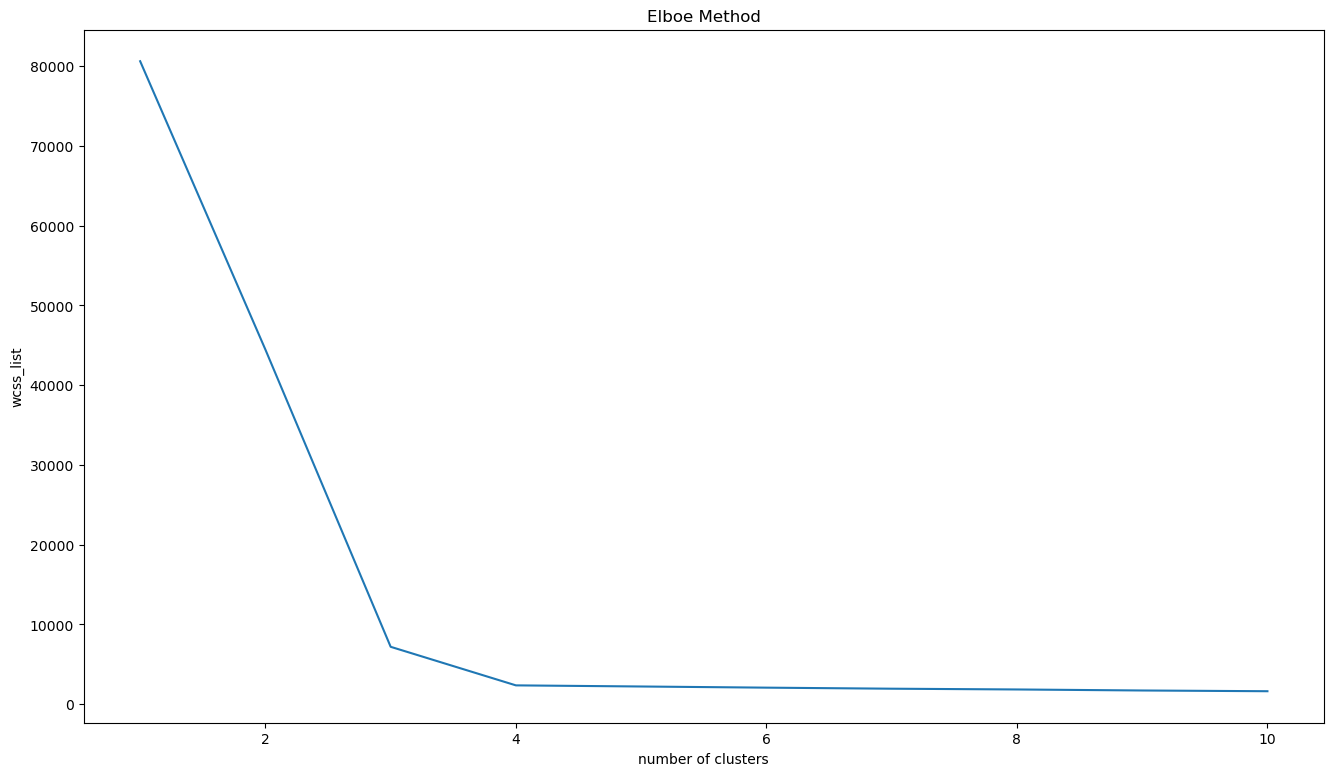

In [17]:
plt.plot(range(1,11),wcss_list)
plt.title("Elboe Method")
plt.xlabel("number of clusters")
plt.ylabel("wcss_list")
plt.show()

## Clusterng

In [20]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [22]:
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [24]:
data=pd.read_csv("Mall_Customers.csv")

In [26]:
data.shape

(200, 5)

In [28]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [30]:
print(data['Gender'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


In [32]:
#getting values and plotting it
f1=data["Annual Income (k$)"].values
f2=data["Spending Score (1-100)"].values

In [34]:
for key in data.keys():
    print(key)

CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1-100)


In [36]:
X=np.array(list(zip(f1,f2)))
#X=[[1,1], [1,2], [3,3], [4,4]]
plt.scatter(f1,f2,c="black",s=20)

In [63]:
kmeans=KMeans(n_clusters=4)

In [65]:
#fitting input data
kmeans=kmeans.fit(X)

In [67]:
#Getting customer labels
labels=kmeans.predict(X)

In [69]:
# centroid values
C=kmeans.cluster_centers_

In [71]:
print(C)

[[25.72727273 79.36363636]
 [87.         18.63157895]
 [86.53846154 82.12820513]
 [48.16831683 43.3960396 ]]


In [73]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,0])

In [79]:
ax.scatter(X[:,0],X[:,1],X[:,2],c='y')
ax.scatter(C[:,0],C[:,1],C[:,2],marker="*",c='#050505',s=100)

IndexError: index 2 is out of bounds for axis 1 with size 2

In [81]:
print(labels)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
